# Support Vector Machine (SVM)
- 딥러닝 이전에 분류에서 뛰어난 성능으로 많이 사용되었던 분류 모델
- 하나의 분류 그룸을 다른 그룹과 분리하는 최적의 경계를 찾아내는 알고리즘
- 중간 크기의 데이터셋과 특성이(Feature) 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다
- 데이터에 비례해서 시간이 걸린다. 데이터가 적당할수록 성능이 좋다

## 선형(Linear) SVM
**선 (1)과 (2)중 어떤 선이 최적의 분류일까?**
<figure>
    <img src="svm_png/svm_01.png">
</figure>

<figure>
    <img src="svm_png/svm_02.png">
</figure>

- (2)가 최적의 분류를 위한 경계선이다.
    - 각 클래스의 별로 가장 가까이 있는 데이터간의 거리가 가장 넓다
- 넓다는 것은 겹치는 부분이 적어 새로운 데이터를 예측할 때 모호성이 적어 맞을 확률이 높다
- **SVM 모델은 두 클래스 간의 거리를 가장 넓게 분리할 수 있는 경계선을 찾는 것을 목표로 한다**

## SVM 목표 : support vector간의 최대 margin을 가지는 결정경계를 찾는다
- **Support Vector**: 경계를 찾는데 기준이 되는 데이터포인트, 결정 경계에 가장 가까이 있는 vector(데이터 포인트)를 의미
- **margin**: 두 support vector간의 너비
- margin이 넓은 결정경계를 만드는 함수를 찾는 것
<figure>
    <img src="svm_png/svm_03.png">
</figure>

## 규제 - Hard Margin, Soft Margin
- SVM은 데이터 포인트들을 잘 분리하면서 Margin의 크기를 최대화하는 것이 목적
    - Margin의 최대화에 가장 문제가 되는 것은 이상치(Outlier)
    - Train set의 이상치들은 Overfitting에 주 원인이 된다
- Margin을 나눌 때 Outlier을 얼마나 무시할 것인지에 따라 Hard margin, soft margin으로 나뉜다

- **Hard Margin**
    - Outlier들을 무시하고 Support Vector를 찾는다. Margin이 매우 좁아질 수 있다.
    - 학습시 overfitting 문제가 발생할 수 있다

- **Soft Margin**
    - Outlier들이 Margin 안에 어느정도 포함되도록 기준을 잡는다. Margin의 거리가 넓어진다.
    - 얼마나 많은 Outlier를 무시할지는 하이퍼하라미터로 설정
    - 무시하는 비율이 크면 잘 분리해야 할 것도 이상치로 판단해 underfitting 문제가 발생할 수 있다
    
![image](https://www.researchgate.net/profile/Cheng-Soon-Ong/publication/23442384/figure/fig8/AS:341086548578318@1458332778867/The-effect-of-the-soft-margin-constant-C-on-the-decision-boundary-We-modified-the-toy.png)

## 하이퍼파라미터 C
- 이상치를 무시하는 비율을 설정하는 하이퍼파라미터
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **하이퍼파라미터인 C값**을 조정해 마진을 변경
- 기본값 : 1
- C값이 크면 제약조건이 강하다
    - 마진폭이 좁아져 마진 오류가 작지만 Overfitting 가능성이 있다
- C값이 작으면 제약조건이 약하다
    - 마진폭이 넓어져 마진 오류가 크다
    - 훈련데이터에서 성능이 떨어지지만 일반화(generalization)되어 테스트 데이터 성능이 올라간다.
    - Underfitting 가능성이 있다

## Linear SVM에서 C의 변화에 따른 성능 변화 확인
- Overfitting : C값을 줄인다
- Underfitting : C값을 늘린다

### import

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

### 데이터 로딩, train/test set 나누기

In [2]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

### Feature Scaling

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 모델생성 및 학습
- 규제 파라미터인 C값을 변경하면서 성능 확인

In [4]:
c_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_acc_list = []
test_acc_list = []

for c in c_list:
    svc = SVC(kernel = 'linear', C = c, random_state = 0)
    svc.fit(X_train_scaled, y_train)
    
    train_pred = svc.predict(X_train_scaled)
    test_pred = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

###  결과 확인

In [5]:
result = pd.DataFrame({
    'train' : train_acc_list, 
    'test' : test_acc_list
}, index = c_list)

result.rename_axis('C', axis = 0, inplace = True)
result

,train,test
C,,
0.0001,0.643192,0.643357
0.0010,0.936620,0.944056
0.0100,0.978873,0.965035
0.1000,0.990610,0.958042
1.0000,0.990610,0.965035
10.0000,0.992958,0.958042
100.0000,1.000000,0.916084


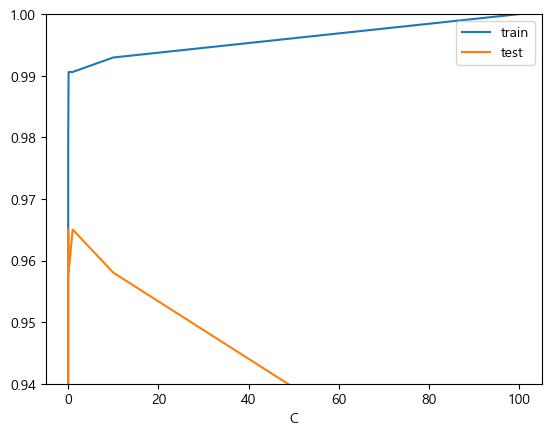

In [6]:
import matplotlib.pyplot as plt
result.plot(ylim = (0.94, 1.0))
plt.show()

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
[-4. -3. -2. -1.  0.  1.  2.]


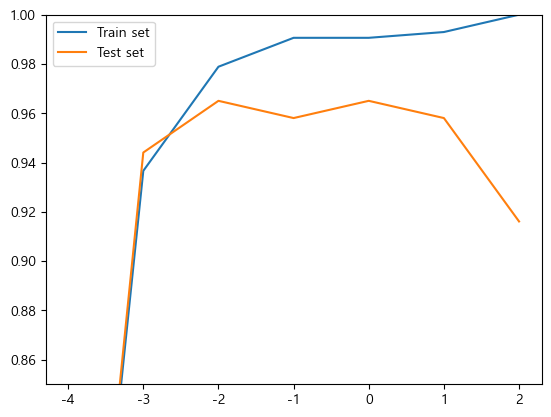

In [7]:
c = np.log10(np.array(c_list))
print(c_list)
print(c)
plt.plot(c, result['train'], label = 'Train set')
plt.plot(c, result['test'], label = 'Test set')
plt.legend()
plt.ylim(0.85, 1.0)
plt.show()

## Kernel SVM (비선형(Non Linear) SVM)
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우
<figure>
    <img src="svm_png/svm_04.png">
</figure>

- 다항식 특성을 추가하여 차원을 늘려 선형 분리가 되도록 변환 

[2차원으로 변환 $x_3=x_1^2$ 항 추가]
<figure>
    <img src="svm_png/svm_05.png">
</figure>

[원래 공간으로 변환]
<figure>
    <img src="svm_png/svm_06.png">
</figure>

### Kernel trick(커널 트릭)
- 비선형 데이터셋을 선형으로 분리하기 위해 차원을 변경해야 한다
- 이때 사용하는 함수를 **Kernel**, 차원 변경을 **kernel trick**이라 한다
    - 대표적인 kernel 함수
        - **Radial kernel**
        - Polynomial kernel
        - Sigmoid kernel

- **Non linear SVM 모델의 하이퍼파라미터**
    - C
        - 오차 허용 기준 관련 규제
            - 기본 값은 1이며 클수록 규제를 강하게 하고 작을 수록 규제를 약하게 한다
        - 모델이 과대적합(Overfitting)일 경우 값을 감소, 과소적합(Underfitting)일 경우 값을 증가
    - gamma
        - Kernel 함수 규제 값
            - 기본 값은 1이며 클수록 규제를 강하게 하고 작을수록 규제를 약하게 한다
        - 모델이 과대적합(Overfitting)일 경우 값을 감소, 과소적합(Underfitting)일 경우 값을 증가

In [8]:
gamma_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_acc_list = []
test_acc_list = []

for gamma in gamma_list:
    svc = SVC(kernel = 'rbf',
              C = 1, 
              gamma = gamma,
              random_state = 0
              )
    svc.fit(X_train_scaled, y_train)
    
    train_pred = svc.predict(X_train_scaled)
    test_pred = svc.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

In [9]:
result2 = pd.DataFrame({
    'train' : train_acc_list,
    'test' : test_acc_list
}, index = gamma_list)
result2.rename_axis('gamma', axis = 0, inplace = True)

In [10]:
result2

,train,test
gamma,,
0.0001,0.791080,0.797203
0.0010,0.950704,0.958042
0.0100,0.985915,0.958042
0.1000,0.995305,0.923077
1.0000,1.000000,0.636364
10.0000,1.000000,0.629371
100.0000,1.000000,0.629371


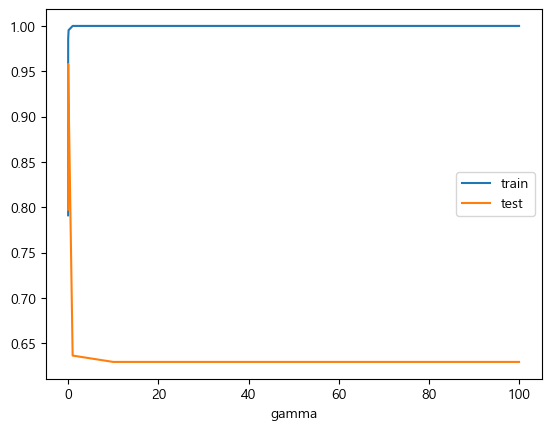

In [12]:
result2.plot()
plt.show()

### ROC AUC score, AP score
- 모델이 예측한 **양성의 확률** => model.predict_proba(X)

In [13]:
svc = SVC(C = 1.0, gamma = 0.001, random_state = 0, probability = True)

svc.fit(X_train_scaled, y_train)

SVC(gamma=0.001, probability=True, random_state=0)

In [14]:
test_proba = svc.predict_proba(X_test_scaled)[:, 1]

In [15]:
from sklearn.metrics import roc_auc_score, average_precision_score

print('roc_auc_score:', roc_auc_score(y_test, test_proba))
print('average_precision_score:', average_precision_score(y_test, test_proba))

roc_auc_score: 0.9842767295597484
average_precision_score: 0.9901499415880832


## GridSearch로 최적의 조합 찾기
### GridSearchCV 생성 및 학습
- kernel : rbf, linear
- C, gamma : 0.0001 ~ 10 => 10의 제곱배
- LinearSVC : C
- RBF SVC : C, gamma

In [16]:
from sklearn.pipeline import Pipeline

steps = [
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state = 0, probability = True))
]

pipeline = Pipeline(steps, verbose = True)

In [17]:
# GridSearchCV
params = {
    'svc__kernel' : ['linear', 'rbf', 'poly'],
    'svc__C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],
    'svc__gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

gs = GridSearchCV(pipeline, params, scoring = ['accuracy', 'roc_auc'], refit = 'accuracy', cv = 4, n_jobs = -1)
gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.1s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True, random_state=0))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             refit='accuracy', scoring=['accuracy', 'roc_auc'])

### 결과확인

In [19]:
print('best_params:', gs.best_params_)
print('best_score:', gs.best_score_)

best_params: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
best_score: 0.9812643272791395


In [20]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_accuracy').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
97,0.067981,0.024388,0.039485,0.038497,10,0.01,rbf,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.971963,0.971963,...,0.981264,0.009302,1,0.993657,0.987687,1.0,0.999621,0.995241,0.005035,4
72,0.054217,0.016352,0.007997,0.003314,1,0.0001,linear,"{'svc__C': 1, 'svc__gamma': 0.0001, 'svc__kern...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,33
75,0.037978,0.007378,0.006248,0.001299,1,0.001,linear,"{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,33
78,0.047241,0.008421,0.007746,0.004322,1,0.01,linear,"{'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,33
87,0.046005,0.022757,0.005256,0.000837,1,10,linear,"{'svc__C': 1, 'svc__gamma': 10, 'svc__kernel':...",0.981308,0.971963,...,0.981242,0.006578,2,0.986940,0.982463,1.0,0.997348,0.991688,0.007225,33


In [21]:
result.sort_values('rank_test_roc_auc').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
65,0.073737,0.007965,0.009243,0.002046,0.1,0.1,poly,"{'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...",0.859813,0.943925,...,0.922633,0.036270,79,0.998507,0.988433,1.0,0.998864,0.996451,0.004662,1
14,0.032480,0.015329,0.030233,0.023292,0.0001,1,poly,"{'svc__C': 0.0001, 'svc__gamma': 1, 'svc__kern...",0.859813,0.943925,...,0.922633,0.036270,79,0.998134,0.988433,1.0,0.998864,0.996358,0.004623,2
94,0.059593,0.019020,0.042476,0.026010,10,0.001,rbf,"{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...",0.953271,0.962617,...,0.971896,0.014721,16,0.997015,0.985448,1.0,1.000000,0.995616,0.005996,3
97,0.067981,0.024388,0.039485,0.038497,10,0.01,rbf,"{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kerne...",0.971963,0.971963,...,0.981264,0.009302,1,0.993657,0.987687,1.0,0.999621,0.995241,0.005035,4
79,0.038478,0.013712,0.014992,0.004687,1,0.01,rbf,"{'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...",0.934579,0.962617,...,0.964865,0.020184,20,0.994030,0.986194,1.0,0.998864,0.994772,0.005436,5


### 최종 테스트

In [22]:
best_svc = gs.best_estimator_
test_pred = best_svc.predict(X_test)
test_proba = best_svc.predict_proba(X_test)

In [24]:
print('accuracy_score:', accuracy_score(y_test, test_pred))
print('roc_auc_score:', roc_auc_score(y_test, test_proba[:, 1]))

accuracy_score: 0.972027972027972
roc_auc_score: 0.9953878406708596
